In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Walmart.csv')
df
df_org= pd.read_csv('/content/drive/MyDrive/Walmart.csv')
df_org

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Analyzing Basic Metrics

The purpose of doing this analysis to to confirm the shape of the dataset. To check for any missing or null values in the dataset and to understand the different datatypes of the various features in the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


* There are 5,50,068 rows and 10 columns in the data.
* There are no null values.
* The columns user_id, occupation(masked), marital_status, product_category and purchase have integer datatype.
* Rest of the columns(product_id, gender, age, city_category, stay_in_current_city_years) are object datatype.

In [ ]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

The columns gender, age, city_category, stay_in_current_city_years and marital status can be converted into category datatype.

In [ ]:
# Converting gender, age, city_category, stay_in_current_city_years and marital status into categorical Datatypes

temp=['Gender','Age','City_Category','Stay_In_Current_City_Years','Marital_Status']

for i in temp:
  df[i] = df[i].astype('category')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(5), int64(4), object(1)
memory usage: 23.6+ MB


In [ ]:
df.describe()

,User_ID,Occupation,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,5.404270,9263.968713
std,1.727592e+03,6.522660,3.936211,5023.065394
min,1.000001e+06,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,20.000000,23961.000000


* Range of purchase amount is 12 dollars to 23961 dollars.
* Mean purchase amount is 9264 dollars.
* Median purchase amount is 8047 dollars.
* Standard deviation of purchase amount is 5023 dollars.
* Inter quartile range of purchase amount is 5823 to 12054 dollars.

In [ ]:
for i in df.columns[:]:
    print('Value counts for column',i,'-')
    print(df[i].value_counts())
    print('-'*50)

Value counts for column User_ID -
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64
--------------------------------------------------
Value counts for column Product_ID -
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64
--------------------------------------------------
Value counts for column Gender -
M    414259
F    135809
Name: Gender, dtype: int64
--------------------------------------------------
Value counts for column Age -
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64
--------------------------------------------------
Value counts f

## Outliers Detection and Handling Missing Values

In [ ]:
for i in ['Purchase']:
    outliers = []
    p25 = np.percentile(df[i], 25)
    p75 = np.percentile(df[i], 75)
    iqr = p75 - p25
    max_cut = p75 + iqr*1.5
    min_cut = max(0, p25 - iqr*1.5)
    outliers = df.loc[(df[i]<min_cut) | (df[i]>max_cut),i]
    print('Outliers for the column',i,'-')
    print(outliers)
    print('Number of outliers-', len(outliers))
    print('Percentage of outliers =', round((len(outliers)/len(df[i]))*100,2),'%')

Outliers for the column Purchase -
343       23603
375       23792
652       23233
736       23595
1041      23341
          ...  
544488    23753
544704    23724
544743    23529
545663    23663
545787    23496
Name: Purchase, Length: 2677, dtype: int64
Number of outliers- 2677
Percentage of outliers = 0.49 %


There are a total of 2677 Outliers present in the data which make up a total of 0.49% of the total purchase values

In [ ]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

No missing values present in the dataset

## Univariate Analysis

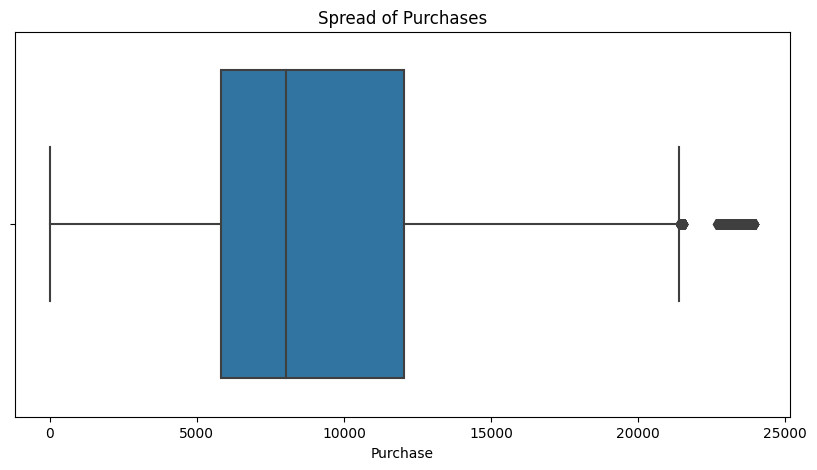

In [ ]:
# Creating a box Plot for Purchase feature

plt.figure(figsize=(10,5))
sns.boxplot(x=df['Purchase'])
plt.title('Spread of Purchases',fontsize=12)
plt.show()

* Median purchase is about 8000
* Inter Quartile Range is 6000 to 12000 dollars.

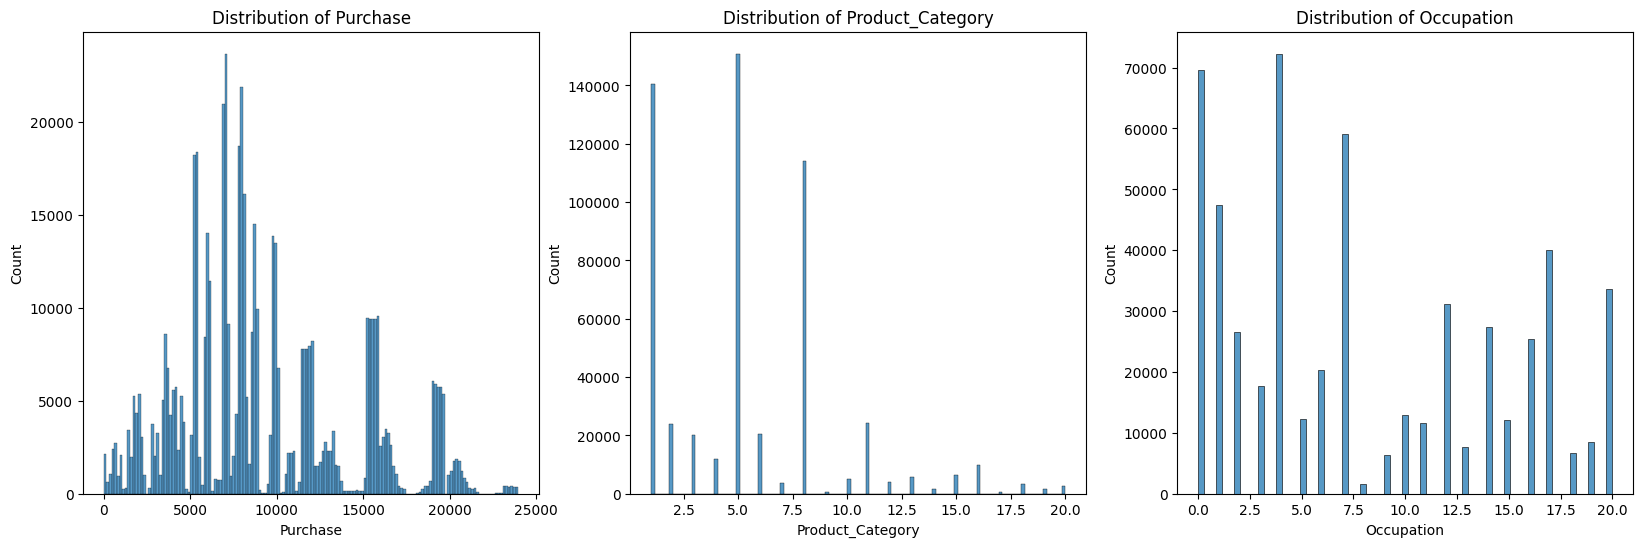

In [ ]:
# Creating distribution plots for Purchase, Product_Category and Occupation.

temp = ['Purchase', 'Product_Category', 'Occupation']
plt.figure(figsize=(20,6))
for i in range(len(temp)):
    plt.subplot(1,3,i+1)
    sns.histplot(df[temp[i]])
    plt.title('Distribution of {feature}'.format(feature = temp[i]))

plt.show()

* Max purchase amount ranges from 5000 to 10000
* Product category 1,5 and 8 are the most frequently bought
* People with occupations 0, 4 and 7 make more purchase than other occupations.

## Analysis of Categorical Features

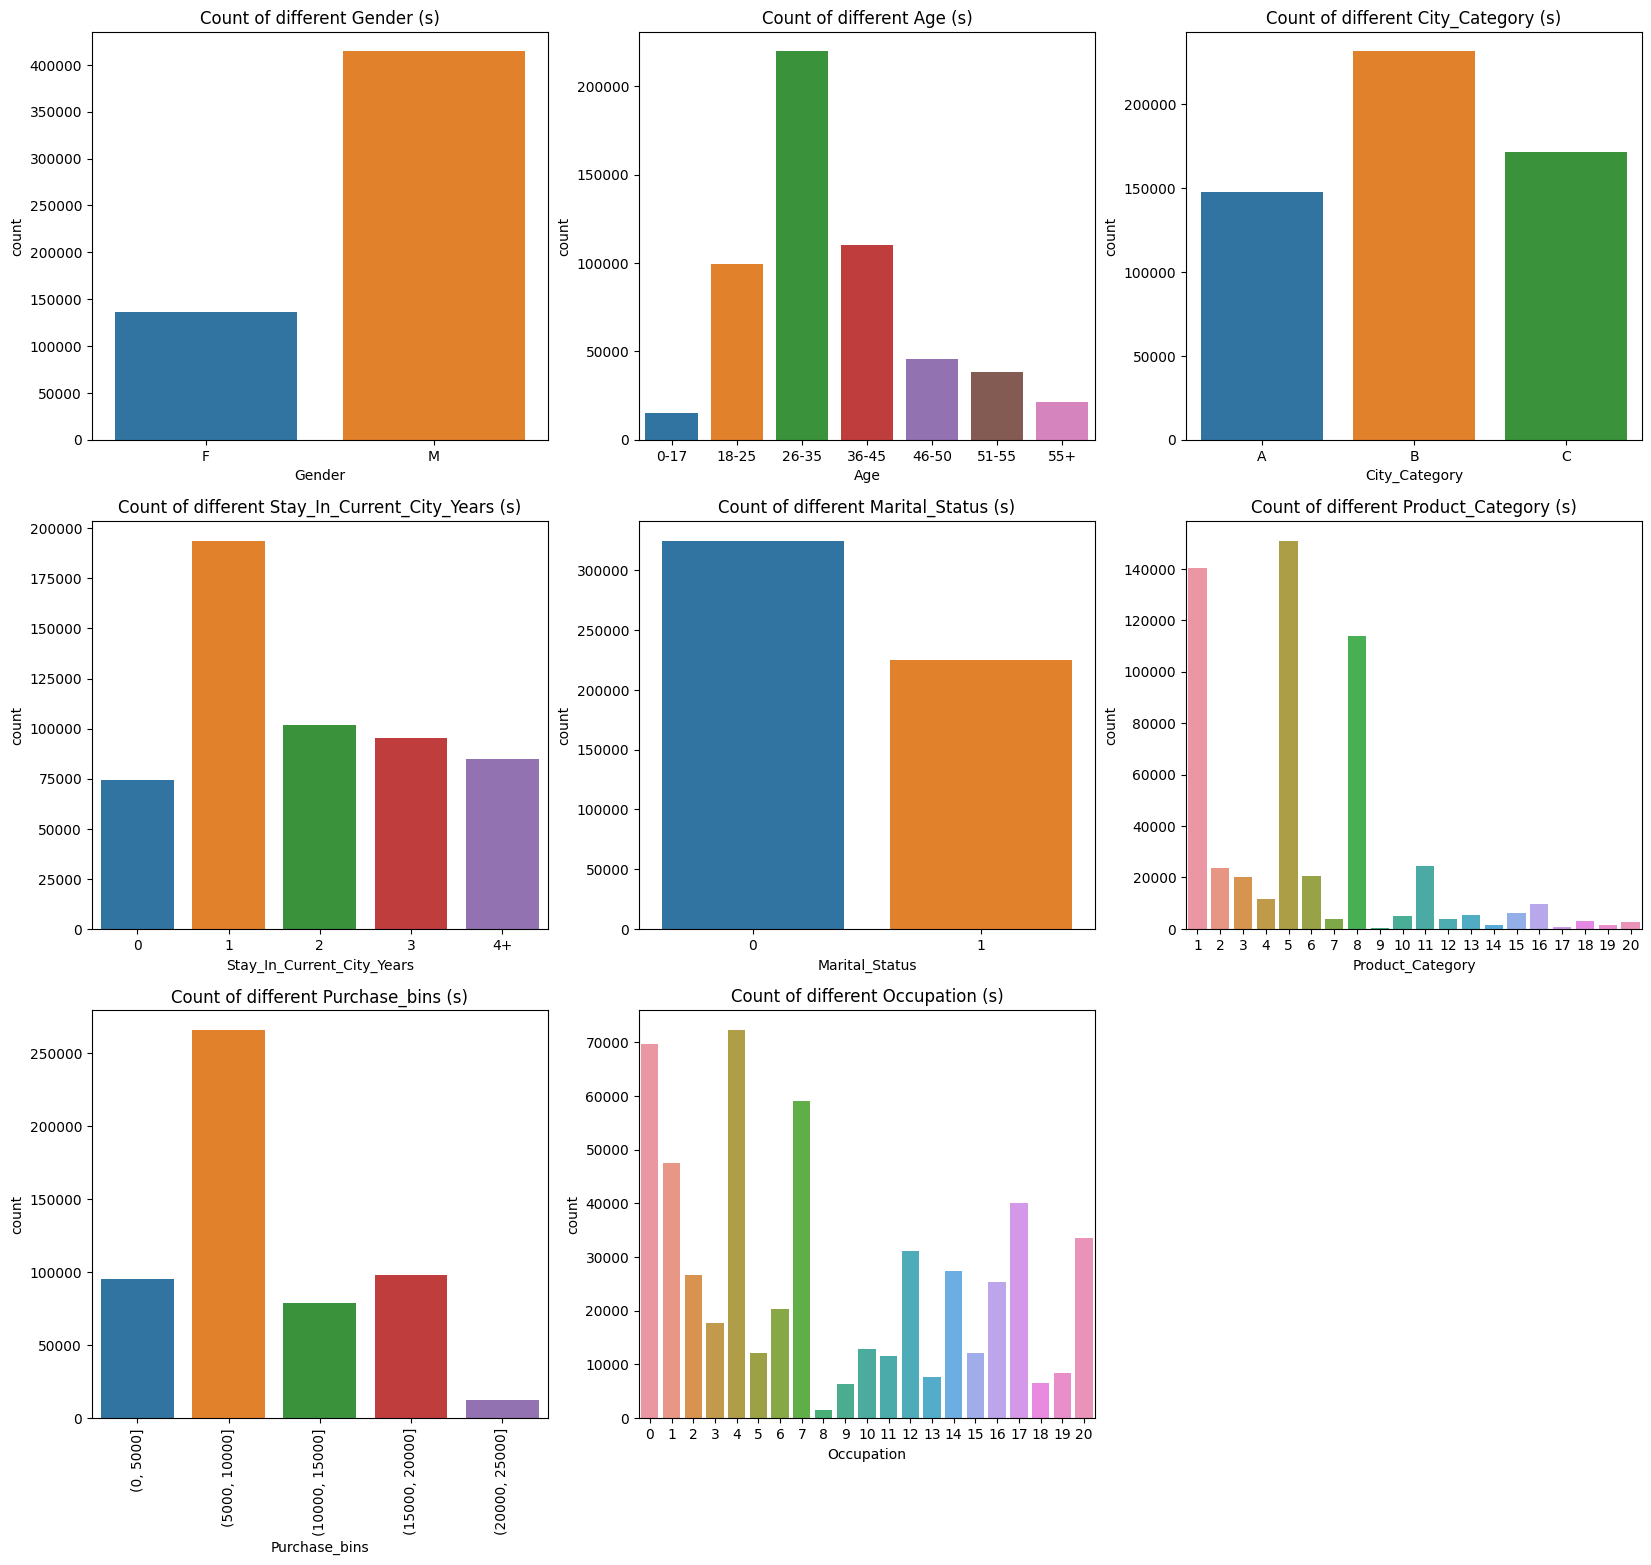

In [ ]:
# Creating bins of purchase amount
df['Purchase_bins'] = pd.cut(df['Purchase'], bins = [0,5000,10000,15000,20000,25000])

# Creating count plots for categorical variables
plt.figure(figsize = (20,18))
temp = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years','Marital_Status', 'Product_Category', 'Purchase_bins', 'Occupation']
for i in range(len(temp)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x = df[temp[i]])
    plt.title('Count of different {temp_i} (s)'.format(temp_i = temp[i]))
    if temp[i] in ['Purchase_bins']:
        plt.xticks(rotation = 90)
plt.show()

* More puchases have been made by males than females.
* People of age group 26–35 have made the maximum number of purchases.
* People in cities of category B have made maximum number of purchases.
* People who have stayed in their city for a year have made the maximum number of purchases.
* Unmarried people have made more purchases than married peole.
* Products of category 1, 5 and 8 sold most frequently.
* Purchases of amount (5000, 10000] were maximum in number.
* People of occupation 0,4 and 7 have made more purchases than other occupations.
* People of occupation 8 have made least purchases.

## Bivariate Analysis

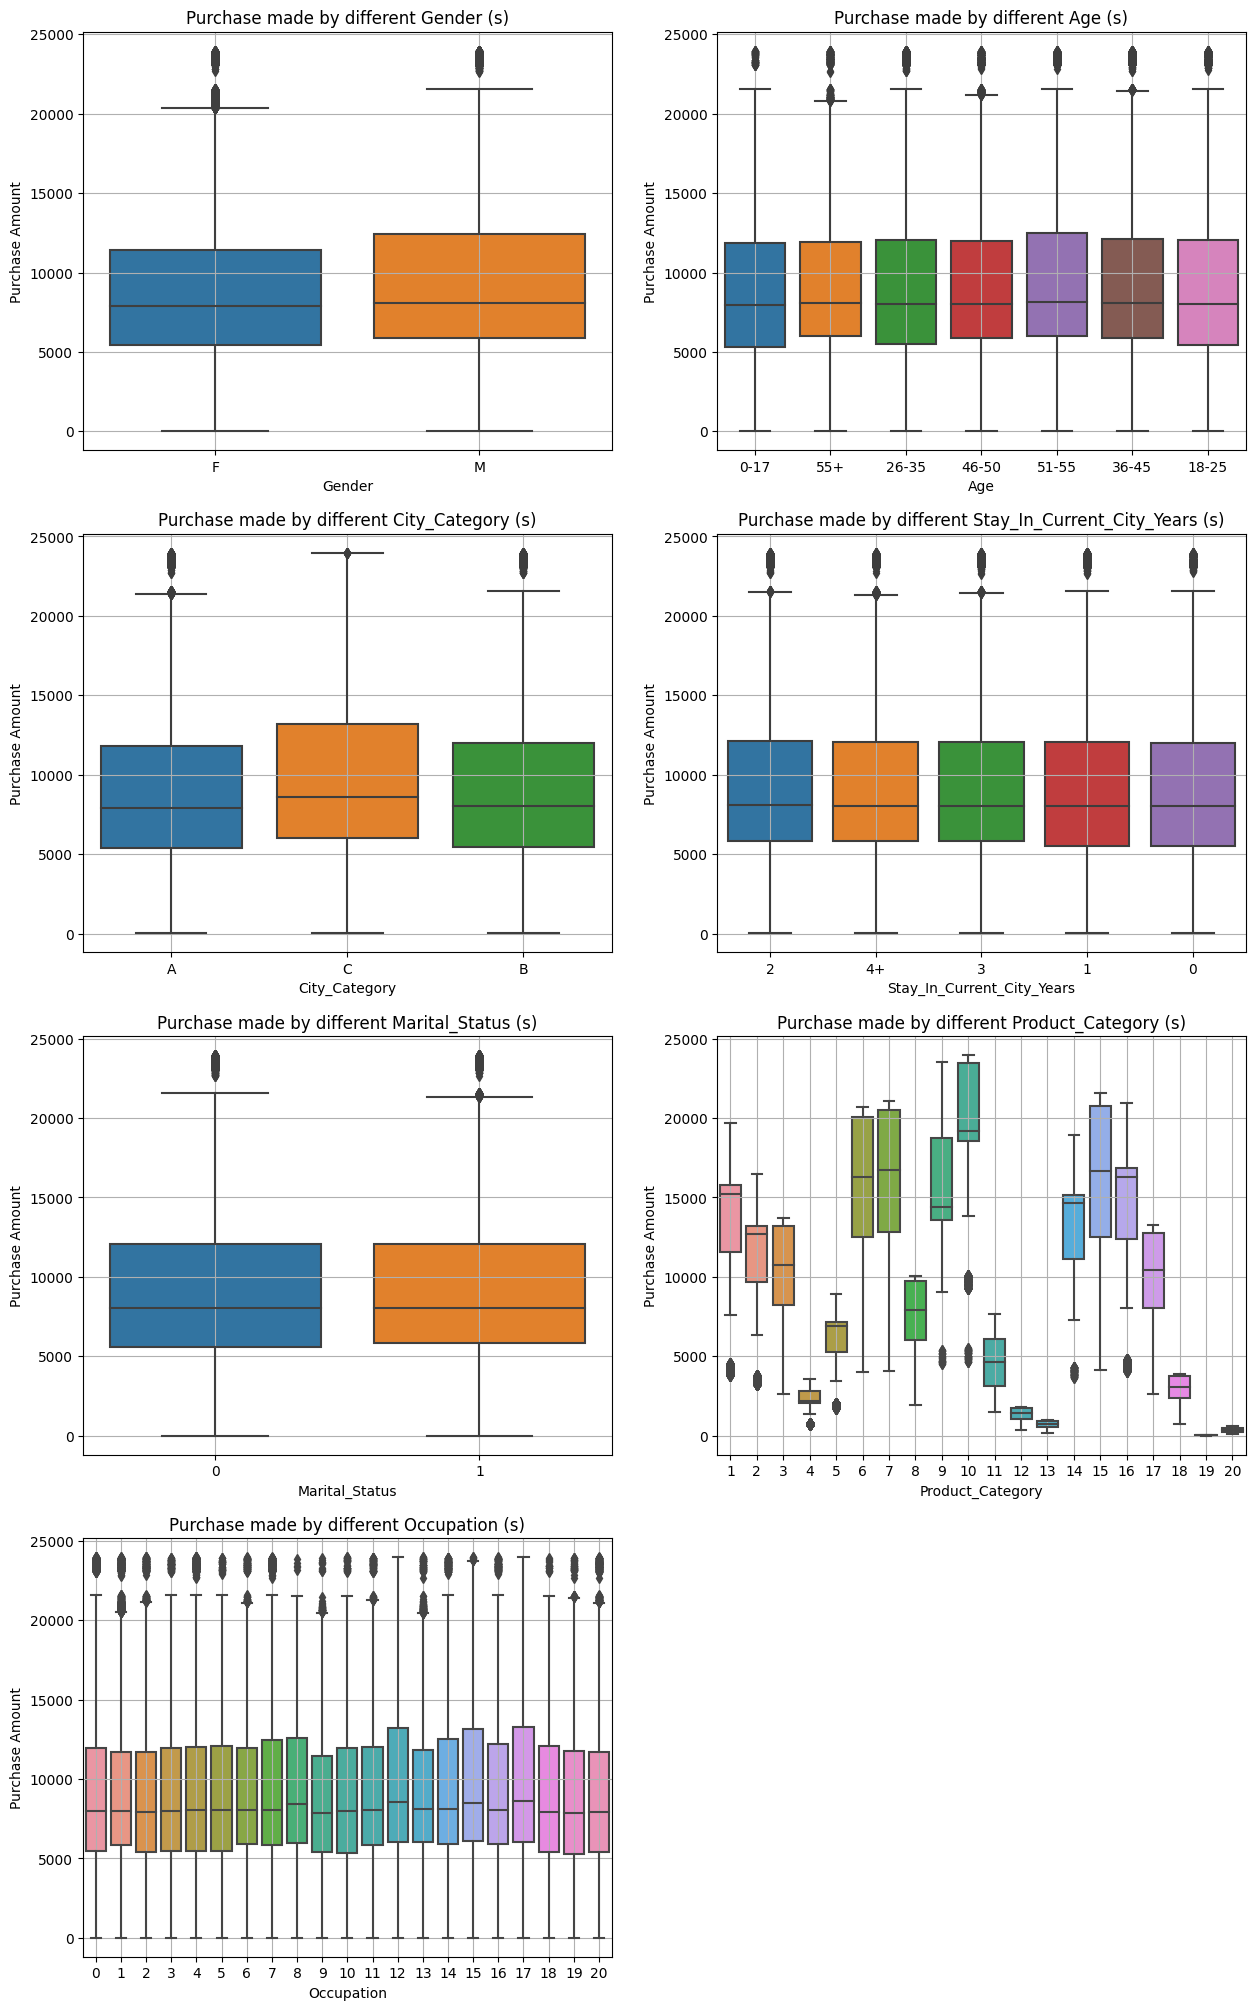

In [ ]:
# Creating bi-variate boxplots (purchase vs categorical-variable)

plt.figure(figsize=(15,25))
temp = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years','Marital_Status', 'Product_Category','Occupation']
for i in range(len(temp)):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x = df[temp[i]], y = df['Purchase'])
    plt.title('Purchase made by different {temp_i} (s)'.format(temp_i = temp[i]))
    plt.ylabel('Purchase Amount')
    plt.grid()
plt.show()



* Median purchase amounts of males and females are similar.
* Median purchase amounts of all age groups are similar.
* Median purchase amount of city of category C is slightly higher than other city categories.
* Median purchase amounts of product category 10 is highest, category 19 is lowest.
* Median purchase amount of occupations 12 and 17 are slightly higher than other occupations.

# Finding corelation between numerical features in the Data


In [ ]:
# Checking to see if there is any corelation between the numerical features in the data.

df_copy = df_org.copy()
df_copy['Gender'].replace({'F' : 1, 'M': 0}, inplace = True)
df_copy['Age'].replace({'0-17':1, '18-25':2,'26-35':3, '36-45':4,'46-50':5,'51-55':6,'55+':7 }, inplace=True)
df_copy['City_Category'].replace({'A':1, 'B':2, 'C':3}, inplace=True)

df_copy.corr().round(2)

<ipython-input-8-5337ac3abcd6>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy.corr().round(2)


,User_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category,Purchase
User_ID,1.00,0.03,0.03,-0.02,0.02,0.02,0.00,0.00
Gender,0.03,1.00,0.00,-0.12,0.00,0.01,0.05,-0.06
Age,0.03,0.00,1.00,0.09,0.12,0.31,0.06,0.02
Occupation,-0.02,-0.12,0.09,1.00,0.03,0.02,-0.01,0.02
City_Category,0.02,0.00,0.12,0.03,1.00,0.04,-0.01,0.06
Marital_Status,0.02,0.01,0.31,0.02,0.04,1.00,0.02,-0.00
Product_Category,0.00,0.05,0.06,-0.01,-0.01,0.02,1.00,-0.34
Purchase,0.00,-0.06,0.02,0.02,0.06,-0.00,-0.34,1.00


<ipython-input-9-79a22d061b25>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_copy.corr().round(2), annot = True)


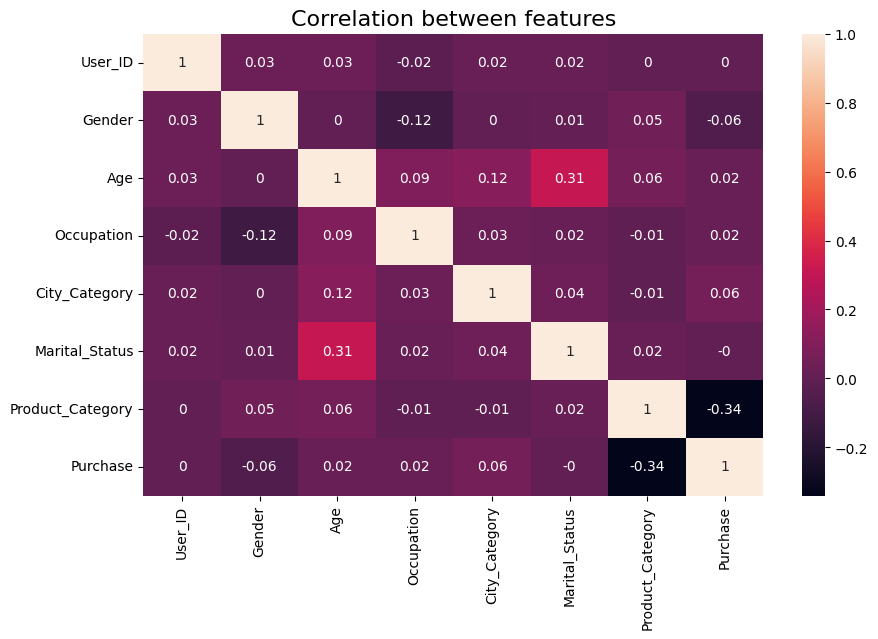

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(df_copy.corr().round(2), annot = True)
plt.title('Correlation between features', fontsize = 16)
plt.show()

* We don’t see a strong correlation of purchase with any feature.
* There’s a weak negative correlation between product category and purchase amount.
* Weak positive correlation between age and marital status.

Plotting all the numerical features against one another in pairs. Making gender the primary focus in our analysis plotting male and female data in different color points

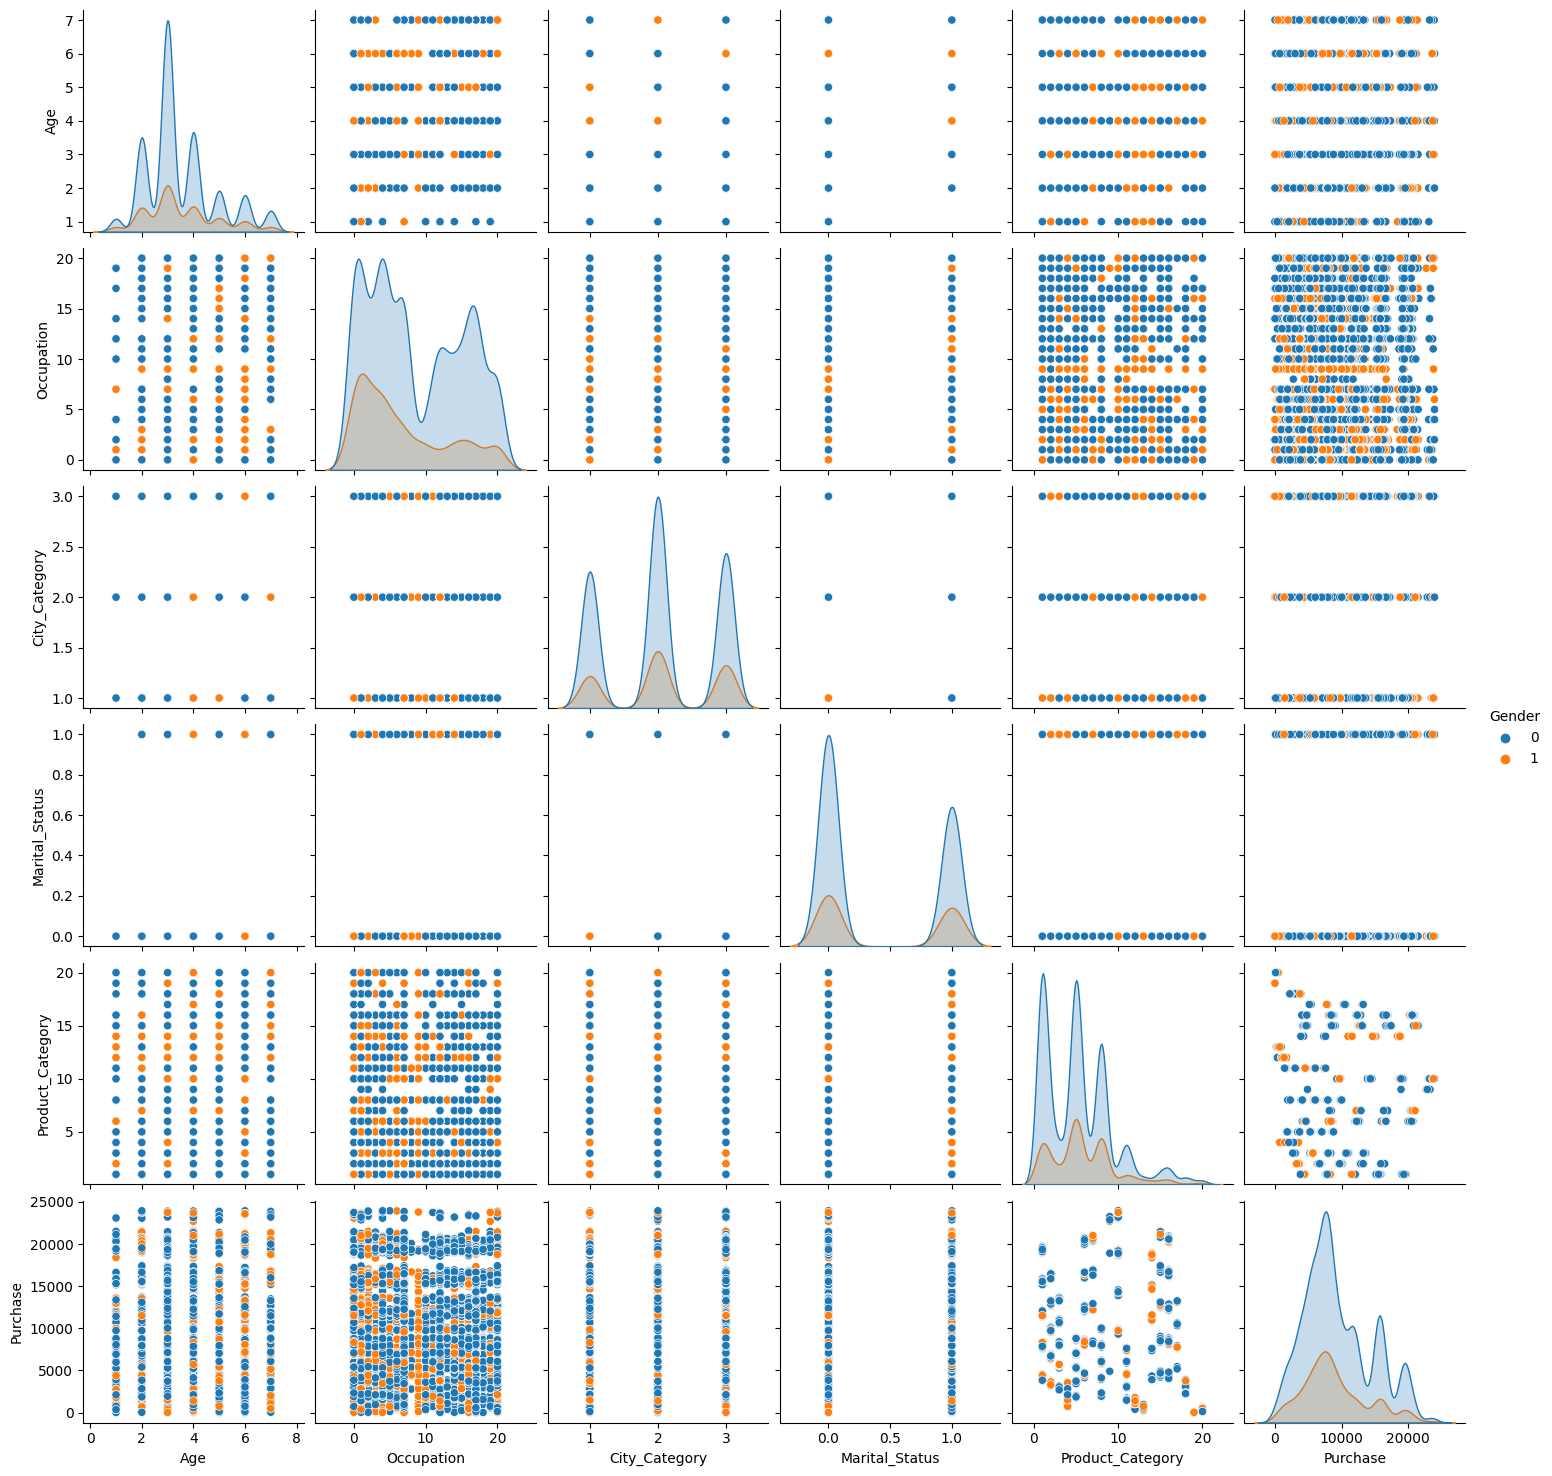

In [ ]:
# Taking a sample of 10000 entries to create pair wise plots
# Blue color dots are male. Orange are female.
sns.pairplot(df_copy.sample(10000).iloc[:,1:], hue = 'Gender', diag_kind = 'kde')
plt.show()

* Both males and females of city category B make more purchases compared to city categories A and C.
* Females purchase products of category 4, 11, 15, 17 and 18 less often.
* Most popular product category among males is 1.
* Most popular product category among females is 5. It is popular among male customers as well.
* Females with occupation 0–10 made more purchases than females with occupations 11–20.

## Sampling

To, find confidence intervals we will have to take a number of samples and calculate their means. Then, to calculate 90 percent confidence interval for example, we find the 5th and 95th percentile values in all the means calculated from the samples.

# For male vs Female Users

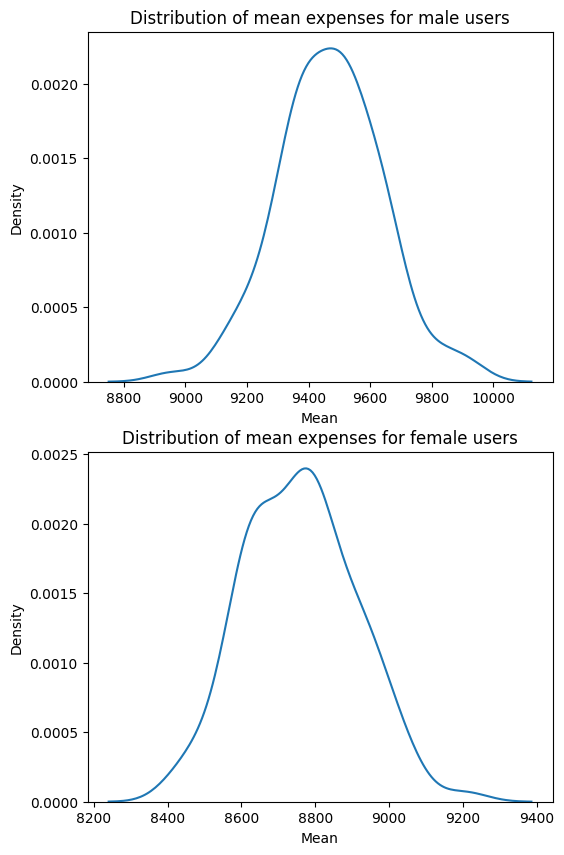

In [ ]:
# Taking samples of 1000 entries for both genders and
# Creating kde plots to check if it appears gaussian.
plt.figure(figsize=(6,10))
x = 1
for j in ['M','F']:
    means = []
    for i in range(100):
        temp = df.loc[df['Gender']==j,'Purchase'].sample(1000)
        avg = temp.mean()
        means.append(avg)
    plt.subplot(2,1,x)
    sns.kdeplot(x = means)
    if j == 'M':
        gen = 'male'
        means_m = means
    else:
        gen = 'female'
        means_f = means
    plt.title('Distribution of mean expenses for {g} users'.format(g = gen), fontsize = 12)
    plt.xlabel('Mean')
    x += 1
plt.show()

In [ ]:
# Finding different confidence intervals for males and females
for i in ['males', 'females']:
    print('For {g}-'.format(g = i))
    if i == 'males':
        means = means_m
        gen = 'M'
    else:
        means = means_f
        gen = 'F'
    print('Mean of sample means =',np.mean(means))
    print('Population mean =', np.mean(df.loc[df['Gender']==gen, 'Purchase']))
    print('Standard deviation of means (Standard Error) =', np.std(means))
    print('Standard deviation of population =',df.loc[df['Gender']==gen, 'Purchase'].std() )
    print('99% CONFIDENCE INTERVAL for mean expense by {g} users-'.format(g = i))
    print((np.percentile(means, 0.5).round(2), np.percentile(means, 99.5).round(2)))
    print('95% CONFIDENCE INTERVAL for mean expense by {g} users-'.format(g = i))
    print((np.percentile(means, 2.5).round(2), np.percentile(means, 97.5).round(2)))
    print('90% CONFIDENCE INTERVAL for mean expense by {g} users-'.format(g = i))
    print((np.percentile(means, 5).round(2), np.percentile(means, 95).round(2)))
    print('-'*50)

For males-
Mean of sample means = 9470.000839999999
Population mean = 9437.526040472265
Standard deviation of means (Standard Error) = 169.18239799327364
Standard deviation of population = 5092.18620977797
99% CONFIDENCE INTERVAL for mean expense by males users-
(9032.1, 9913.46)
95% CONFIDENCE INTERVAL for mean expense by males users-
(9145.73, 9821.29)
90% CONFIDENCE INTERVAL for mean expense by males users-
(9195.58, 9712.66)
--------------------------------------------------
For females-
Mean of sample means = 8758.370519999999
Population mean = 8734.565765155476
Standard deviation of means (Standard Error) = 149.2827937904084
Standard deviation of population = 4767.233289291458
99% CONFIDENCE INTERVAL for mean expense by females users-
(8432.28, 9133.88)
95% CONFIDENCE INTERVAL for mean expense by females users-
(8484.72, 9041.49)
90% CONFIDENCE INTERVAL for mean expense by females users-
(8524.68, 9005.14)
--------------------------------------------------


# For Married vs Unmarried Users

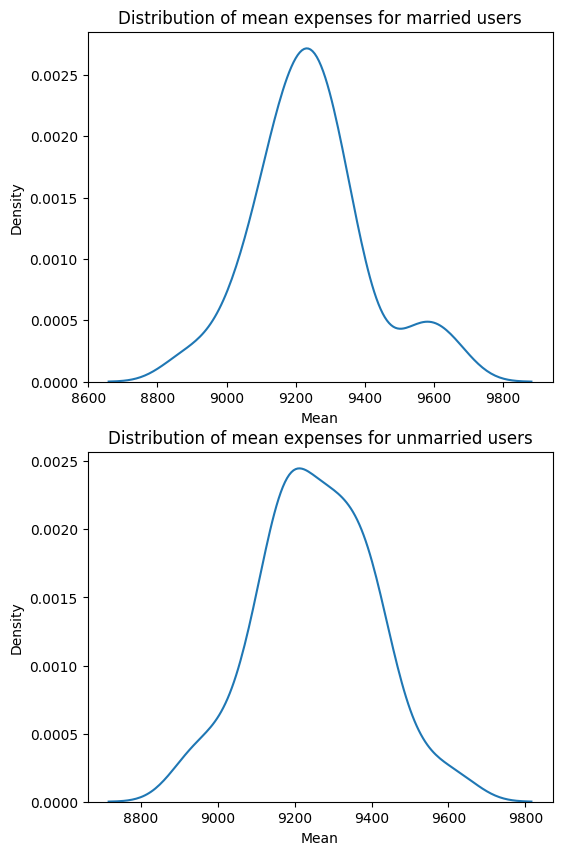

In [ ]:
# Taking samples of 1000 entries for married and unmarried people and
# Creating kde plots to check if it appears gaussian.
plt.figure(figsize=(6,10))
x = 1
for j in [1,0]:
    means = []
    for i in range(100):
        temp = df.loc[df['Marital_Status']==j,'Purchase'].sample(1000)
        avg = temp.mean()
        means.append(avg)
    plt.subplot(2,1,x)
    sns.kdeplot(x = means)
    if j == 0:
        ms = 'unmarried'
        means_mr = means
    else:
        ms = 'married'
        means_umr = means
    plt.title('Distribution of mean expenses for {m} users'.format(m = ms), fontsize = 12)
    plt.xlabel('Mean')
    x += 1
plt.show()

In [ ]:
# Finding different confidence intervals for mean expense by married and unmarried customers
for i in ['married', 'unmarried']:
    print('For {m}-'.format(m = i))
    if i == 'married':
        means = means_mr
        ms = 1
    else:
        means = means_umr
        ms = 0
    print('Mean of sample means =',np.mean(means))
    print('Population mean =', np.mean(df.loc[df['Marital_Status']==ms, 'Purchase']))
    print('Standard deviation of means (Standard Error) =', np.std(means))
    print('Standard deviation of population =',df.loc[df['Marital_Status']==ms, 'Purchase'].std() )
    print('99% CONFIDENCE INTERVAL for mean expense by {m} users-'.format(m = i))
    print((np.percentile(means, 0.5).round(2), np.percentile(means, 99.5).round(2)))
    print('95% CONFIDENCE INTERVAL for mean expense by {m} users-'.format(m = i))
    print((np.percentile(means, 2.5).round(2), np.percentile(means, 97.5).round(2)))
    print('90% CONFIDENCE INTERVAL for mean expense by {m} users-'.format(m = i))
    print((np.percentile(means, 5).round(2), np.percentile(means, 95).round(2)))
    print('-'*50)

For married-
Mean of sample means = 9255.763350000001
Population mean = 9261.174574082374
Standard deviation of means (Standard Error) = 149.40245990279914
Standard deviation of population = 5016.897377793055
99% CONFIDENCE INTERVAL for mean expense by married users-
(8913.11, 9630.8)
95% CONFIDENCE INTERVAL for mean expense by married users-
(8943.76, 9555.55)
90% CONFIDENCE INTERVAL for mean expense by married users-
(9005.94, 9485.62)
--------------------------------------------------
For unmarried-
Mean of sample means = 9243.638140000001
Population mean = 9265.907618921507
Standard deviation of means (Standard Error) = 166.0596610242848
Standard deviation of population = 5027.347858674449
99% CONFIDENCE INTERVAL for mean expense by unmarried users-
(8858.41, 9674.95)
95% CONFIDENCE INTERVAL for mean expense by unmarried users-
(8931.04, 9627.62)
90% CONFIDENCE INTERVAL for mean expense by unmarried users-
(9004.56, 9582.66)
--------------------------------------------------


* Mean expense by married customers is 9261.17
* Mean expense by unmarried customers is 9265.90
* There’s is overlap between 90%, 95% and 99% confidence intervals for both.
* We don’t have enough statistical evidence to compare their expenses.

# For different Age Groups

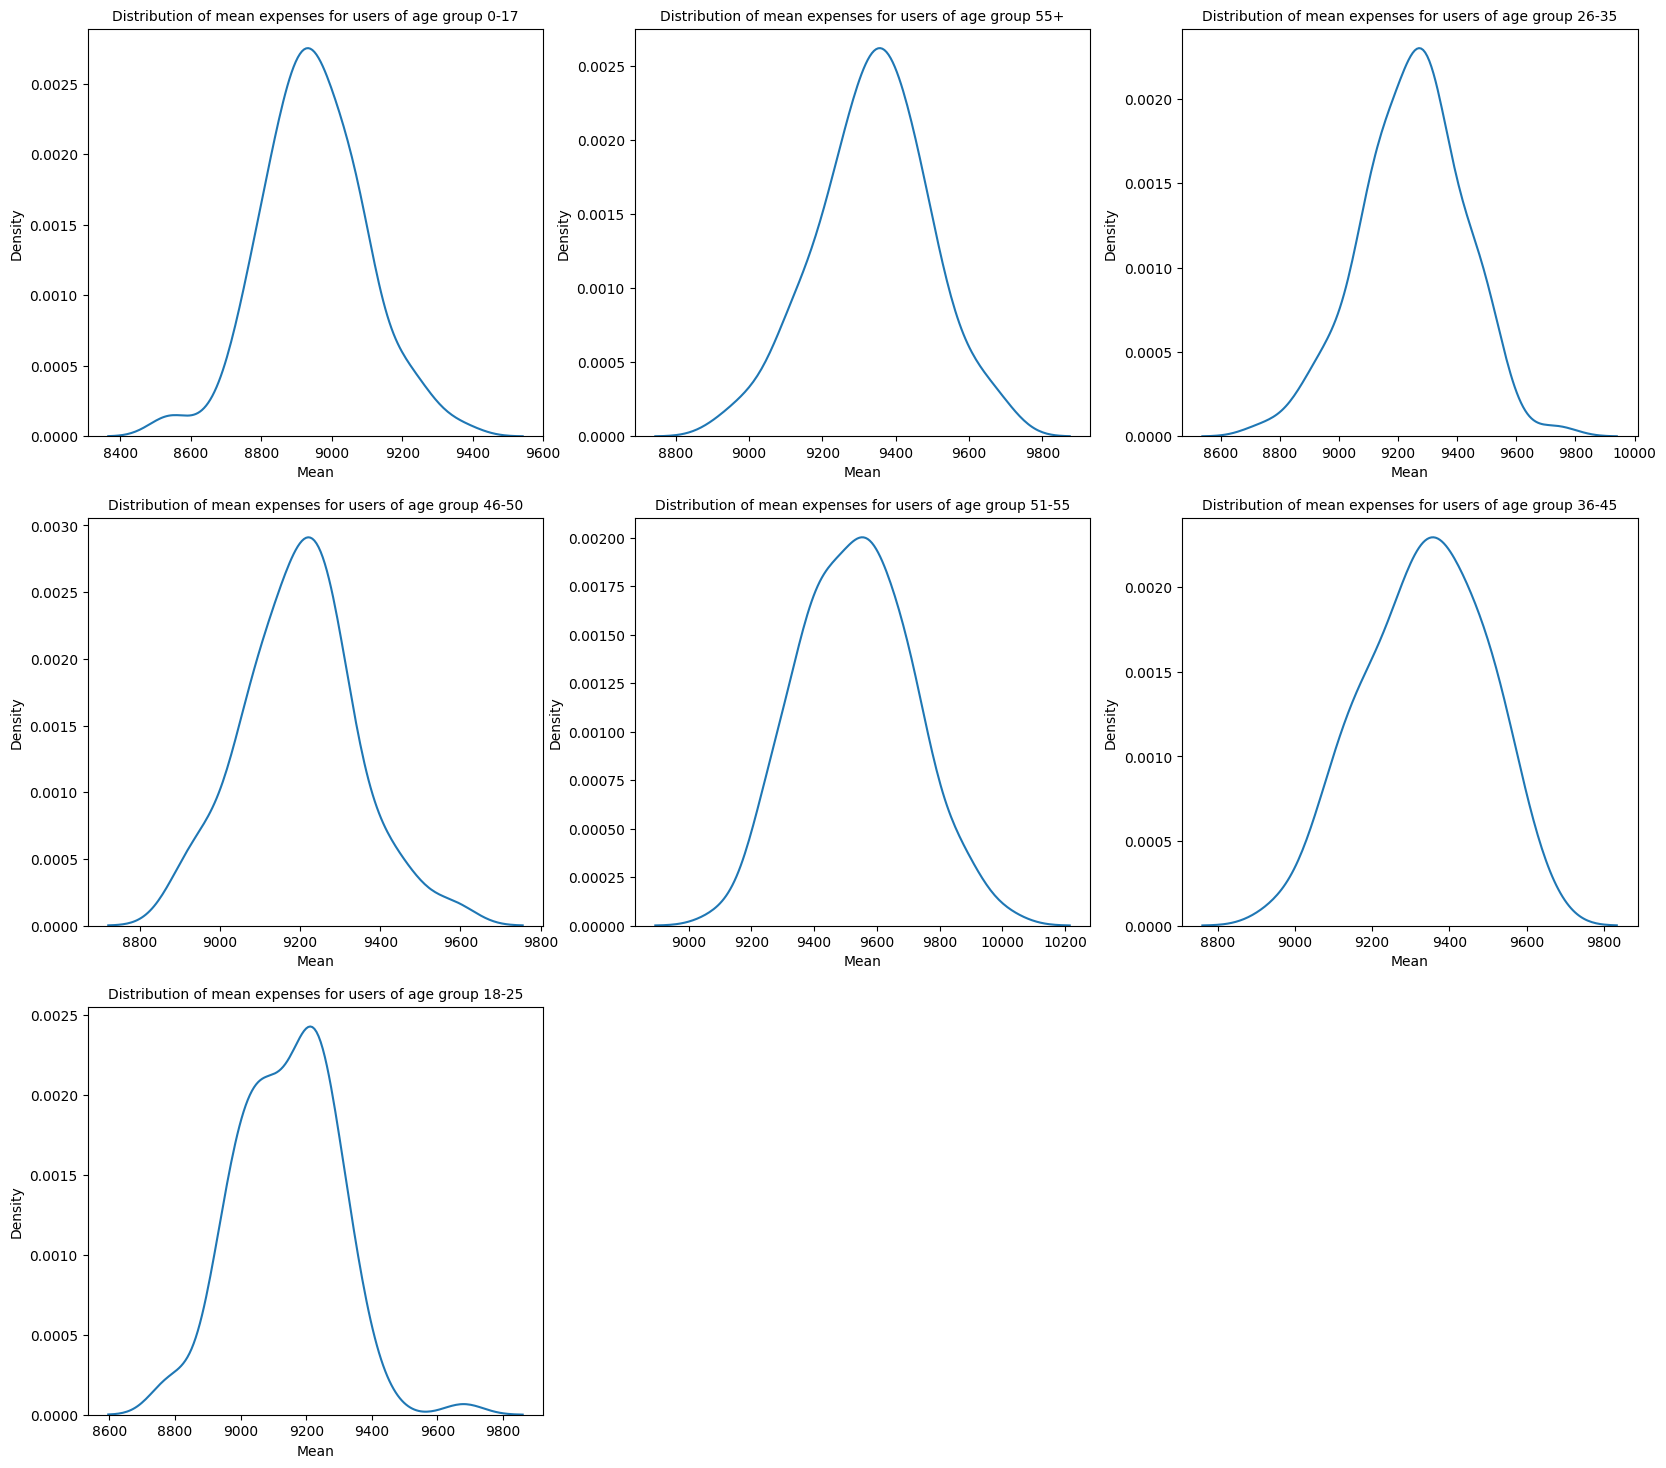

In [ ]:
# Taking 100 samples of 1000 entries for each age group and
# Plotting KDE plots to see if their distribution looks gaussian
plt.figure(figsize=(20,18))
x = 1
for j in ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']:
    means = []
    for i in range(100):
        temp = df.loc[df['Age']==j,'Purchase'].sample(1000)
        avg = temp.mean()
        means.append(avg)
    plt.subplot(3,3,x)
    sns.kdeplot(x = means)
    if j == '0-17':
        means_0 = means
    elif j == '55+':
        means_55 = means
    elif j == '26-35':
        means_26 = means
    elif j == '46-50':
        means_46 = means
    elif j == '51-55':
        means_51 = means
    elif j == '36-45':
        means_36 = means
    else:
        means_18 = means
    plt.title('Distribution of mean expenses for users of age group {a}'.format(a = j), fontsize=10)
    plt.xlabel('Mean')
    x += 1
plt.show()

In [ ]:
# Finding confidence intervals for mean purchase for each age group
for i in ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']:
    print('For {m}-'.format(m = i))
    if i == '0-17':
        means = means_0
    elif i == '55+':
        means = means_55
    elif i == '26-35':
        means = means_26
    elif i == '46-50':
        means = means_46
    elif i == '51-55':
        means = means_51
    elif i == '36-45':
        means = means_36
    else:
        means = means_18

    print('Mean of sample means =',np.mean(means))
    print('Population mean =', np.mean(df.loc[df['Age']==i, 'Purchase']))
    print('Standard deviation of means (Standard Error) =', np.std(means))
    print('Standard deviation of population =',df.loc[df['Age']==i, 'Purchase'].std() )
    print('99% CONFIDENCE INTERVAL for mean expense by users of age group {a}-'.format(a = i))
    print((np.percentile(means, 0.5).round(2), np.percentile(means, 99.5).round(2)))
    print('95% CONFIDENCE INTERVAL for mean expense by users of age group {a}-'.format(a = i))
    print((np.percentile(means, 2.5).round(2), np.percentile(means, 97.5).round(2)))
    print('90% CONFIDENCE INTERVAL for mean expense by users of age group {a}-'.format(a = i))
    print((np.percentile(means, 5).round(2), np.percentile(means, 95).round(2)))
    print('-'*50)

For 0-17-
Mean of sample means = 8949.12777
Population mean = 8933.464640444974
Standard deviation of means (Standard Error) = 144.9381361028114
Standard deviation of population = 5111.11404600277
99% CONFIDENCE INTERVAL for mean expense by users of age group 0-17-
(8539.72, 9321.21)
95% CONFIDENCE INTERVAL for mean expense by users of age group 0-17-
(8684.85, 9251.83)
90% CONFIDENCE INTERVAL for mean expense by users of age group 0-17-
(8742.17, 9190.59)
--------------------------------------------------
For 55+-
Mean of sample means = 9337.91614
Population mean = 9336.280459449405
Standard deviation of means (Standard Error) = 151.74370167516142
Standard deviation of population = 5011.4939956034605
99% CONFIDENCE INTERVAL for mean expense by users of age group 55+-
(8956.11, 9686.25)
95% CONFIDENCE INTERVAL for mean expense by users of age group 55+-
(9017.67, 9637.77)
90% CONFIDENCE INTERVAL for mean expense by users of age group 55+-
(9095.98, 9590.1)
-----------------------------

* 99% Confidence Interval for 0–17 is less than 51–55 without overlap.
* We can say with 99% confidence that expense of 0–17 is less compared to expense of 51–55 ages.

# Insights

* Walmart can keep products like P00265242 and P00025442 (which are selling a lot) in the inventory. Products like P00056342 P00350742 (which are not selling) need not be kept in store.
* Ads can be targeted towards people of age group 26–35, since they are making maximum purchases. Walmart can also include new products required by people of this age group.
* Ads can be targeted towards people of city category B. Inventory in these cities can be replenished.
* Ads can be targeted towards people who have spent between 1 to 2 years in their cities.
* Ads can be targeted towards unmarried people.
* Products of categories 1, 5 and 8 can be kept in inventory as well as made easily visible in the stores.
* Offers/rewards can be given on purchases above 12000 dollars to nudge customers to make more purchases.
* More products popular among people with occupations 0, 4 and 7 can be kept in store.


# Recommendations

* Give offers/rewards on purchases above 12000 to nudge customers to spend more.
* Target ads towards people of city category B.
* Target ads towards people who have spent between 1 to 2 years in their city.
* Target ads towards unmarried people.
* Target ads for products which cost between 9151 and 9790 towards males.
* Target ads for products which cost between 8507 and 9051 towards females.
* Target ads for products which cost between 9225 to 9908 towards 51–55 year old people.
* Target ads for products which cost between 8611 to 9235 towards 0–17 year old people.

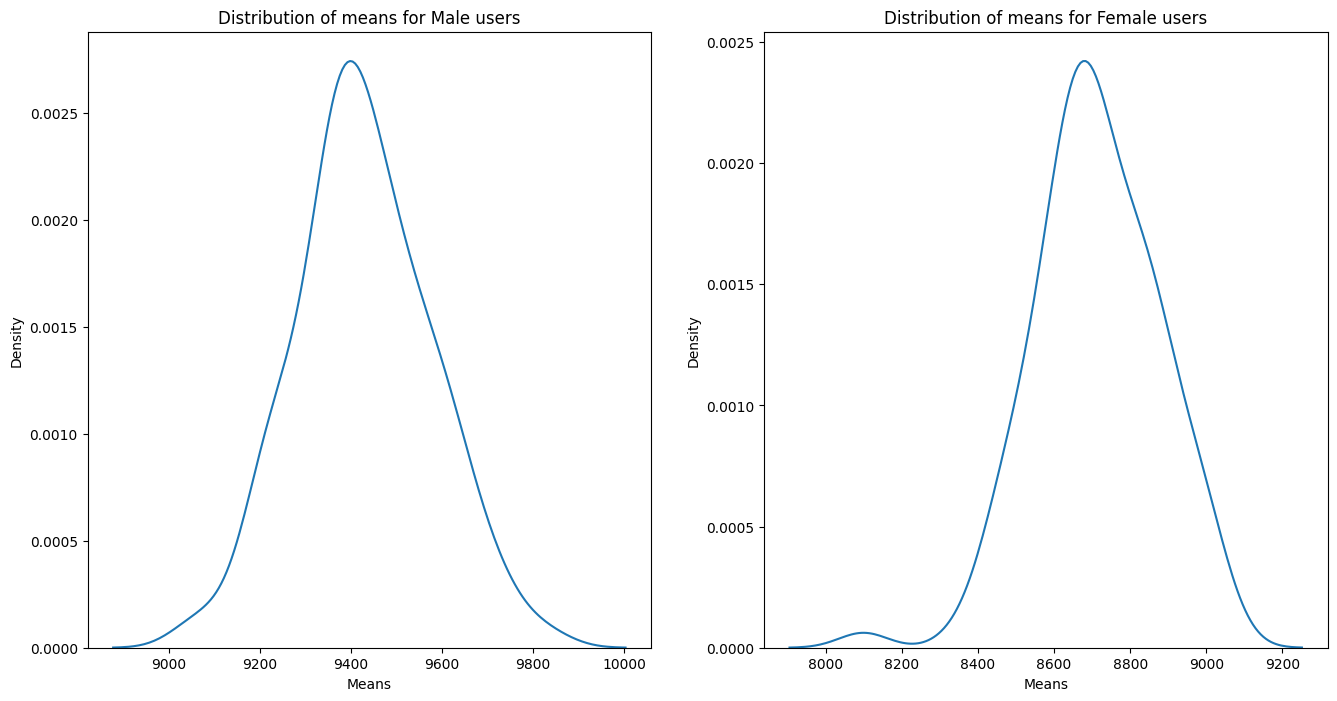

In [ ]:
plt.figure(figsize=(16,8))
x=1

for i in ['M','F']:
  means=[]
  for j in range(100):
    temp=df[df['Gender']==i]['Purchase'].sample(1000)
    avg=temp.mean()
    means.append(avg)
  plt.subplot(1,2,x)
  sns.kdeplot(x=means)
  if i=='M':
    gen='Male'
    means_m=means
  else:
    gen='Female'
    means_f=means
  plt.title('Distribution of means for {g} users'.format(g=gen))
  plt.xlabel('Means')
  x+=1
plt.show()


In [ ]:
for i in ['males','females']:
  print('For {g}-'.format(g=i))
  if i=='males':
    means=means_m
    gen='M'
  else:
    means=means_f
    gen='F'
  print('Mean of sample means=',np.mean(means))
  print('Population mean = ',np.mean(df[df['Gender']==gen]['Purchase']))
  print('Standard Deviation of means is',np.std(means))
  print('Standard Deviation of population is',df[df['Gender']==gen]['Purchase'].std())
  print('99% confidence interval for {g} users'.format(g=i))
  print((np.percentile(means,0.5)).round(2),(np.percentile(means,99.5)).round(2))
  print('95% confidence interval for {g} users'.format(g=i))
  print((np.percentile(means,2.5)).round(2) , (np.percentile(means,97.5)).round(2))
  print('90% confidence interval for {g} users'.format(g=i))
  print((np.percentile(means,5)).round(2),(np.percentile(means,95)).round(2))
  print('*'*50)

For males-
Mean of sample means= 9428.28164
Population mean =  9437.526040472265
Standard Deviation of means is 145.70929493814174
Standard Deviation of population is 5092.18620977797
99% confidence interval for males users
9070.1 9783.5
95% confidence interval for males users
9179.69 9715.0
90% confidence interval for males users
9209.0 9680.82
**************************************************
For females-
Mean of sample means= 8711.677090000001
Population mean =  8734.565765155476
Standard Deviation of means is 161.86230019001303
Standard Deviation of population is 4767.233289291458
99% confidence interval for females users
8229.94 9032.66
95% confidence interval for females users
8437.89 8998.86
90% confidence interval for females users
8467.53 8982.35
**************************************************
